<a href="https://colab.research.google.com/github/AzenethSH/Estadistica/blob/main/eii_u2_ep_22150511.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TECNOLOGICO NACIONAL DE MEXICO**
##**INSTITUTO TECNOLOGICO DE AGUSCALIENTES**


---




 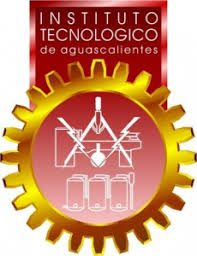

##**INGENIERIA EN GESTION EMPRESARIAL**
##**ESTADISTICA INFERENCIAL II**
## **EXAMEN UNIDAD 2**
##**ALIUMNA: FERNANDA AZENETH SANTOYO HUERTA**
##**DOCENTE: JOSE CRUZ MUÑOZ ESPARZA**

# Introducción

El análisis detallado de estos gráficos nos permite identificar posibles problemas con el modelo ajustado, como relaciones no lineales no capturadas, varianza no constante de los errores o una distribución de los errores que se desvía de la normalidad. La detección de estas violaciones es crucial, ya que pueden afectar la interpretación de los coeficientes del modelo, la validez de las pruebas de hipótesis y la precisión de las predicciones. Por lo tanto, la evaluación exhaustiva de los residuos es un paso indispensable en el proceso de modelado de regresión.

---



# Datos Inservibles

In [50]:
import pandas as pd
import numpy as np

df =pd.read_csv('https://raw.githubusercontent.com/AzenethSH/Estadistica/refs/heads/main/Hipertension_Arterial_Mexico.csv')

df.dropna(inplace = True)
df

,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2022_32056019,2,62,14.2,22,4.8,4.0,34,86.0,139,...,64.25,160.5,51.1,34.5,77.8,125,4,1.000000,280,0
4359,2022_32056024,1,39,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,130,4,19.193721,780,0
4360,2022_32056026,2,69,15.9,11,2.9,1.9,21,44.0,74,...,71.20,148.6,47.2,38.0,0.0,147,4,1.000000,300,0
4361,2022_32056029,1,67,17.6,14,5.5,4.0,44,96.0,171,...,68.20,167.7,51.5,36.5,96.4,108,2,1.000000,240,0


# FOLIO_I

In [51]:
df["FOLIO_I"].unique()

array(['2022_01001004', '2022_01001009', '2022_01001012', ...,
       '2022_32056026', '2022_32056029', '2022_32056030'], dtype=object)

In [52]:
df.drop(columns=['FOLIO_I'], inplace=True)
df

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2,62,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.25,160.5,51.1,34.5,77.8,125,4,1.000000,280,0
4359,1,39,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,130,4,19.193721,780,0
4360,2,69,15.9,11,2.9,1.9,21,44.0,74,0.34,...,71.20,148.6,47.2,38.0,0.0,147,4,1.000000,300,0
4361,1,67,17.6,14,5.5,4.0,44,96.0,171,0.80,...,68.20,167.7,51.5,36.5,96.4,108,2,1.000000,240,0


# sexo

In [53]:
df["sexo"].unique()

array([2, 1])

In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("tension_arterial ~ C(sexo)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(sexo),1.0,2.925676e+04,29256.756043,57.986039,3.216635e-14
Residual,4361.0,2.200335e+06,504.548275,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -5.3175   0.0 -6.6865 -3.9484   True
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -5.3175   0.0 -6.6865 -3.9484   True
---------------------------------------------------


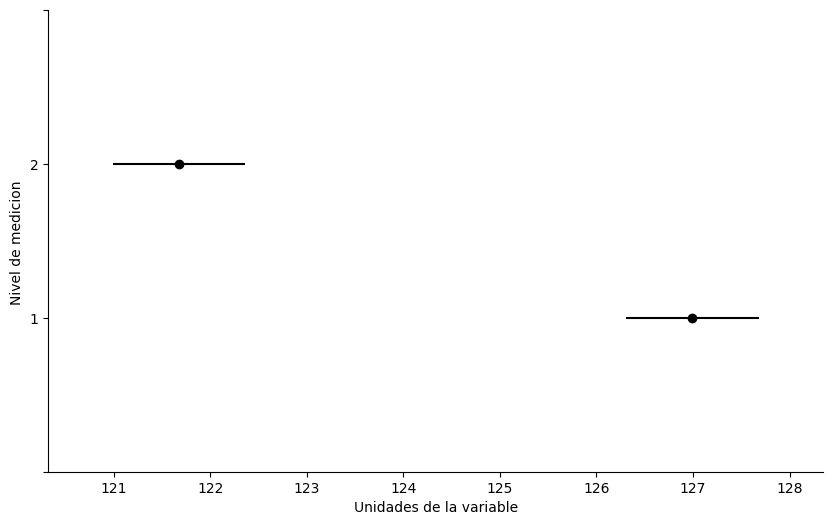

In [55]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia =0.05

tukey = pairwise_tukeyhsd(df['tension_arterial'], df['sexo'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Nivel de medicion ", xlabel = "Unidades de la variable")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("")
print(tukey)

plt.title("")
print(tukey)

In [56]:
niveles = {"Hombre": 1, "Mujer": 2}
df["tension_arteria"] = df["sexo"].map(niveles)

df

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension,tension_arteria
0,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,154.0,48.5,33.5,0.0,107,4,32.889389,120,1,NaN
1,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,152.2,44.5,41.1,113.7,104,2,1.000000,240,0,NaN
2,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,144.8,42.3,37.8,103.7,105,1,1.000000,480,0,NaN
3,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,154.0,48.5,33.5,0.0,117,5,26.265339,275,1,NaN
4,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,161.3,49.6,42.0,118.9,123,2,1.000000,255,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2,62,14.2,22,4.8,4.0,34,86.0,139,0.58,...,160.5,51.1,34.5,77.8,125,4,1.000000,280,0,NaN
4359,1,39,14.2,22,4.8,4.0,34,86.0,139,0.58,...,154.0,48.5,33.5,0.0,130,4,19.193721,780,0,NaN
4360,2,69,15.9,11,2.9,1.9,21,44.0,74,0.34,...,148.6,47.2,38.0,0.0,147,4,1.000000,300,0,NaN
4361,1,67,17.6,14,5.5,4.0,44,96.0,171,0.80,...,167.7,51.5,36.5,96.4,108,2,1.000000,240,0,NaN


# edad

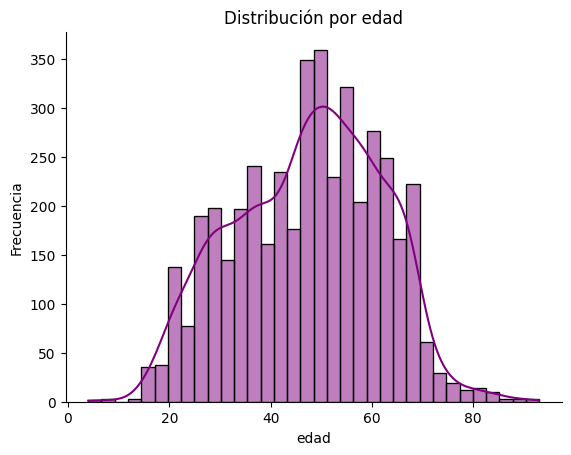

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["edad"], kde = True , color = "purple")

plt.xlabel("edad")
plt.ylabel("Frecuencia")
plt.title("Distribución por edad")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# concentracion_hemoglobina

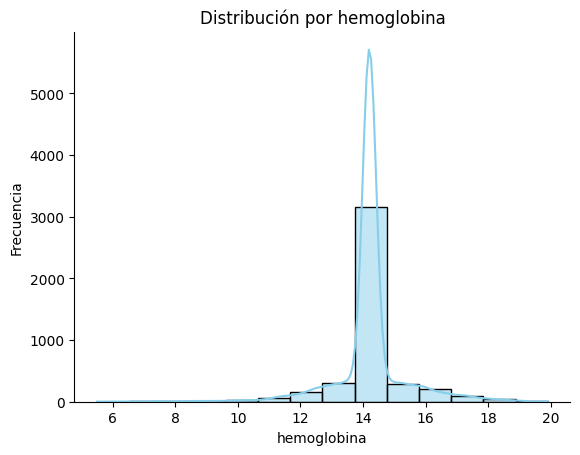

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["concentracion_hemoglobina"], kde = True , color = "skyblue")

plt.xlabel("hemoglobina")
plt.ylabel("Frecuencia")
plt.title("Distribución por hemoglobina")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# temperatura_ambiente

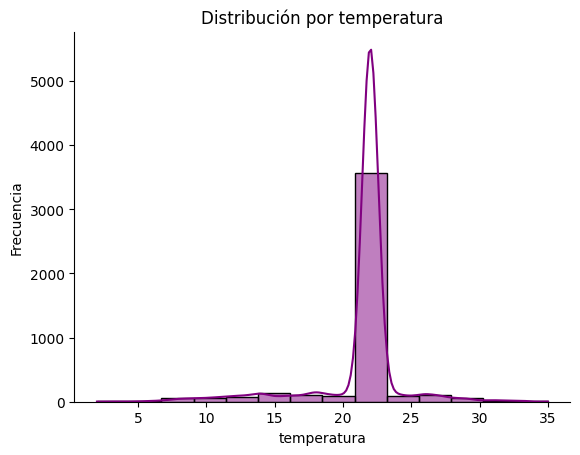

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["temperatura_ambiente"], kde = True , color = "purple")

plt.xlabel("temperatura")
plt.ylabel("Frecuencia")
plt.title("Distribución por temperatura")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# valor_acido_urico

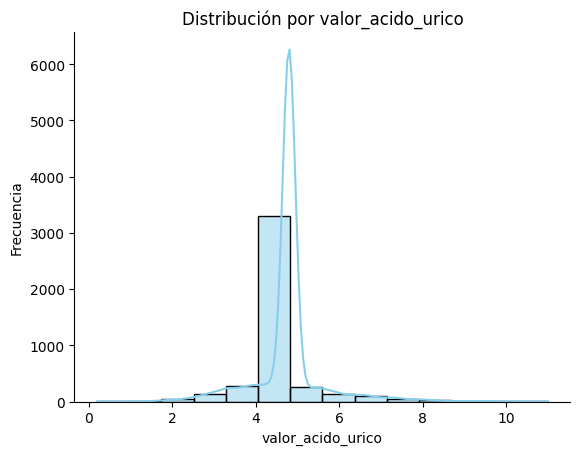

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["valor_acido_urico"], kde = True , color = "skyblue")

plt.xlabel("valor_acido_urico")
plt.ylabel("Frecuencia")
plt.title("Distribución por valor_acido_urico")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# valor_albumina

In [61]:
df["valor_albumina"].unique()

array([4. , 3.8, 4.1, 4.2, 3.4, 4.5, 4.4, 3.6, 4.8, 4.3, 3.2, 3.5, 4.6,
       3.9, 4.7, 1.5, 2.9, 2.8, 2.4, 3. , 3.7, 3.3, 2.7, 2.3, 2.5, 1.7,
       1.9, 2.6, 1.6, 3.1, 5.1, 5. , 2. , 2.1, 2.2, 5.3, 4.9, 1.2, 1.8,
       1. , 5.2])

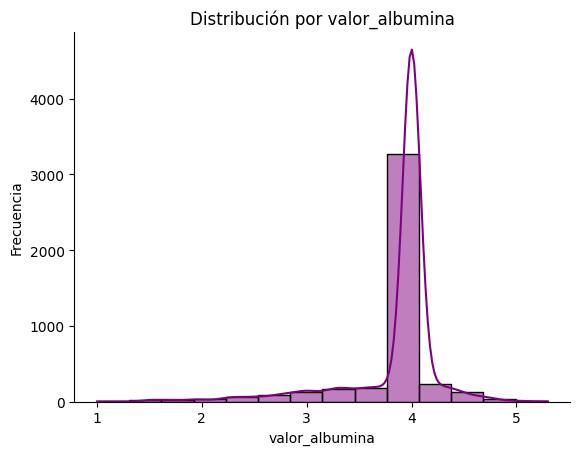

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["valor_albumina"], kde = True , color = "purple")

plt.xlabel("valor_albumina")
plt.ylabel("Frecuencia")
plt.title("Distribución por valor_albumina")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# valor_colesterol_hdl

In [63]:
df["valor_colesterol_hdl"].unique()

array([ 34,  73,  49,  41,  42,  44,  29,  45,  48,  67,  82,  40,  51,
        39,  38,  47,  89,  46,  53,  23,  32,  36,  22,  43,  56,  35,
        25,  26,  68,  31,  52,  27,  59,  62,  50,  15,  33,  61,  30,
        55,  17,  18,  28,  16,  24,  37,  66,  65,  54,  58,  57,  63,
       133,  60,  75,  79,  64,  70,  77, 114,  86,  21,  69,  20,  19,
       279,  80,  84,  13,  88,  14,  78,  72,   9])

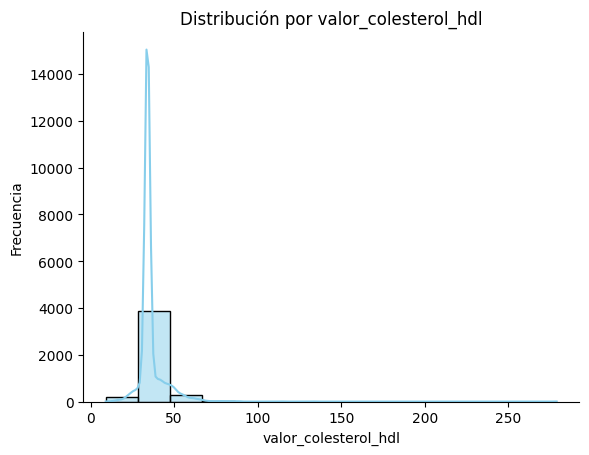

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["valor_colesterol_hdl"], kde = True , color = "skyblue")

plt.xlabel("valor_colesterol_hdl")
plt.ylabel("Frecuencia")
plt.title("Distribución por valor_colesterol_hdl")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# valor_colesterol_ldl

In [65]:
df["valor_colesterol_ldl"].unique()

array([ 86. , 130. , 107. ,  76. ,  84. , 133. , 118. ,  91. , 142. ,
       169. , 140. , 237. ,  73. ,  65. , 164. , 120. ,  88. ,  62. ,
       103. ,  87. ,  75. ,  66. , 157. ,  81. ,  78. ,  55. , 100. ,
       108. ,  56. , 150. , 151. , 101. ,  50. , 109. ,  77. ,  49. ,
        48. ,  95. ,  72. ,  69. ,  54. ,  89. , 114. ,  93. ,  79. ,
        47. , 149. ,  92. ,  99. ,  61. ,  41. ,  40. , 146. , 112. ,
       119. ,  67. , 148. ,  70. ,  98. ,  94. ,  83. ,  58. ,  96. ,
        57. ,  34. ,  42. , 138. ,  90. ,  80. ,  53. ,  44. ,  52. ,
        26. ,  36. ,  43. ,  71. ,  97. , 102. , 115. ,  38. , 113. ,
       163. , 144. , 122. , 132. , 137. , 104. , 153. , 121. , 147. ,
       110. , 127. , 136. , 124. ,  85. , 139. , 106. ,  68. ,  60. ,
        30. ,  82. ,  59. , 126. ,  74. , 111. , 123. , 105. ,  63. ,
        46. , 129. , 135. , 128. ,  33. , 176. , 117. ,  45. , 200. ,
       141. , 161. , 134. , 152. , 155. , 197. , 168. ,  64. , 116. ,
       159. ,  51. ,

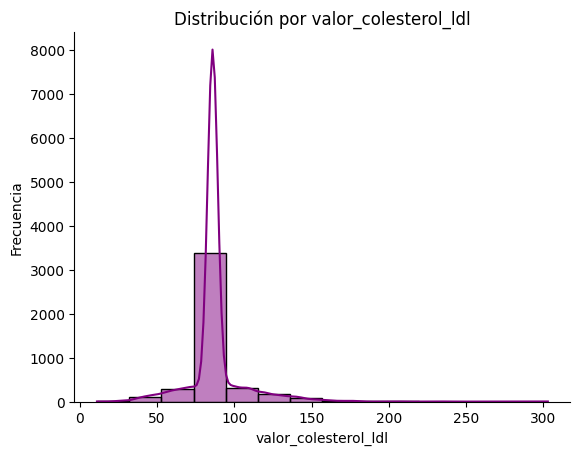

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["valor_colesterol_ldl"], kde = True , color = "purple")

plt.xlabel("valor_colesterol_ldl")
plt.ylabel("Frecuencia")
plt.title("Distribución por valor_colesterol_ldl")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# valor_colesterol_total

In [67]:
df["valor_colesterol_total"].unique()

array([139, 252, 203, 145, 236, 168, 161, 229, 169, 249, 128, 340, 129,
       132, 162, 234, 196, 223, 149, 114, 174, 175, 165, 134, 120, 225,
       143, 237, 121, 176, 201, 178,  73, 144,  93, 224, 159, 172, 109,
        98, 264, 115,  84,  83, 148, 133, 130, 187, 164, 135, 110, 206,
       238, 167, 118,  52, 151, 136, 107,  92, 216, 124, 185, 190, 117,
       140, 123,  96,  94, 116, 146, 160, 199,  54, 150,  66, 141, 186,
        89, 147, 105, 210,  62,  72,  95, 100,  67,  87,  64,  86,  97,
       177, 153, 131, 200, 158, 204, 119,  77, 189, 152, 195, 233, 194,
       156, 182, 171, 217, 173, 246, 256, 231, 183, 230, 211,  59, 166,
       180, 188, 142, 101, 125, 179, 212, 202, 137,  70, 111, 138, 106,
       127, 163, 157, 215, 218, 112, 181, 255, 191, 207, 154, 221, 198,
       102,  81, 219, 192, 213, 289, 280, 242, 226, 245, 240, 228, 267,
       205, 122, 290, 184, 222, 197, 244,  85, 235, 220,  88, 126,  99,
       262, 193, 208, 279,  90, 104, 214, 292, 170, 108, 227, 20

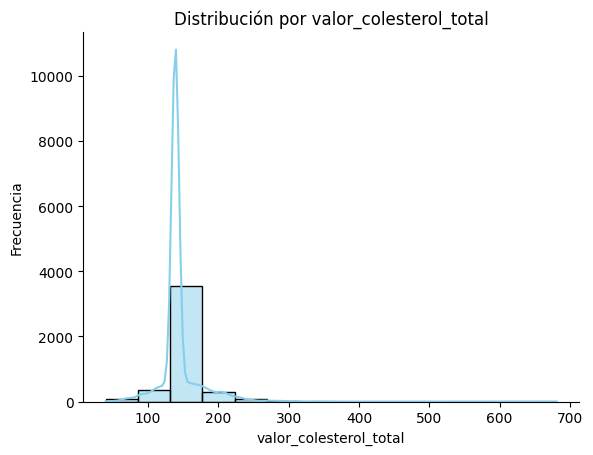

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["valor_colesterol_total"], kde = True , color = "skyblue")

plt.xlabel("valor_colesterol_total")
plt.ylabel("Frecuencia")
plt.title("Distribución por valor_colesterol_total")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# segundamedicion_peso

In [69]:
df["segundamedicion_peso"].unique()

array([ 64.7 ,  96.75,  68.7 ,  97.15,  96.  , 102.45,  63.85,  83.55,
        79.8 ,  75.45,  75.55,  47.85,  59.6 ,  83.65,  62.25, 111.15,
        72.6 , 122.75,  82.3 ,  55.7 ,  89.8 , 103.2 ,  87.05,  92.6 ,
        70.75,  59.3 , 116.4 ,  78.  ,  75.  , 119.05,  64.05,  85.7 ,
        80.85,  62.15,  53.25,  68.8 ,  87.25,  98.35,  61.3 ,  72.1 ,
        90.2 ,  93.2 ,  65.2 ,  65.6 ,  56.5 ,  71.45,  57.1 ,  50.95,
        97.8 ,  71.5 ,  78.9 ,  71.8 ,  68.6 ,  72.9 ,  78.5 ,  66.7 ,
        63.15,  76.5 ,  77.75,  64.3 ,  71.75,  56.6 ,  38.85,  47.8 ,
        58.25,  66.4 ,  55.15,  71.95,  51.2 ,  89.4 ,  77.25,  58.05,
        58.75,  68.85,  60.95,  83.7 ,  72.25,  60.9 ,  86.95,  87.65,
        94.3 ,  65.35,  58.35,  65.1 ,  70.4 ,  53.5 ,  83.05,  69.9 ,
        91.25,  53.3 ,  84.45,  58.55,  88.6 ,  60.85,  68.95,  48.3 ,
        90.25,  85.  ,  89.45,  68.2 ,  75.5 ,  69.4 ,  74.6 ,  57.85,
        73.95,  82.1 ,  67.8 ,  56.05,  75.95,  61.55,  72.35,  53.9 ,
      

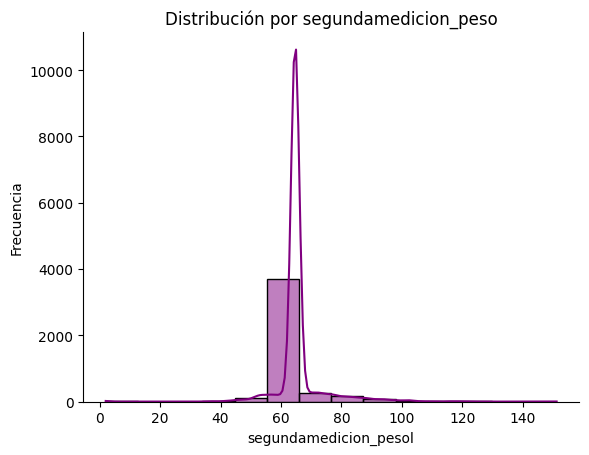

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["segundamedicion_peso"], kde = True , color = "purple")

plt.xlabel("segundamedicion_pesol")
plt.ylabel("Frecuencia")
plt.title("Distribución por segundamedicion_peso")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# segundamedicion_estatura

In [71]:
df["segundamedicion_estatura"].unique()

array([154. , 152.2, 144.8, 161.3, 150. , 134.2, 153.4, 147.3, 182.5,
       156.8, 152.6, 145.2, 150.5, 139.5, 152.8, 159. , 152.3, 169.8,
       172.2, 177.9, 166.6, 168.4, 155.2, 176.2, 155.9, 166.1, 149.2,
       171.5, 176.9, 152. , 169.4, 151.6, 171.4, 162.6, 149.1, 152.9,
       154.6, 154.5, 173.2, 160.2, 148.8, 165.9, 153.9, 148.3, 168.9,
       150.9, 170.1, 145.4, 141.8, 141.9, 155.6, 144. , 137.3, 161.5,
       143.2, 151. , 140.9, 139.9, 169.1, 144.1, 155. , 137.1, 139.2,
       146.9, 142.7, 143.5, 144.5, 163.3, 147.9, 140.8, 150.6, 148. ,
       163.2, 140.6, 156.1, 152.5, 151.2, 167.5, 162.2, 155.1, 156.9,
       157.7, 159.8, 167.7, 158. , 162.7, 153.3, 154.2, 154.7, 151.5,
       157.4, 168.1, 153.5, 143. , 147.1,   0. , 163.8, 168. , 148.6,
       153. , 154.1, 165. , 157.5, 145.6, 141. , 139.8, 145.3, 157. ,
       146.8, 151.4, 135.1, 106.2, 146.1, 163.7, 157.3, 147.4, 142.4,
       139. , 163.9, 149.6, 154.9, 167. , 158.6, 149.4, 146.5, 156.5,
       142.5, 146.7,

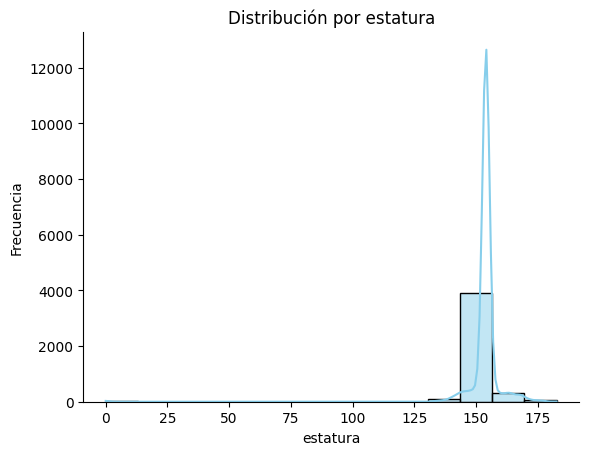

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["segundamedicion_estatura"], kde = True , color = "skyblue")

plt.xlabel("estatura")
plt.ylabel("Frecuencia")
plt.title("Distribución por estatura")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# distancia_rodilla_talon

In [73]:
df["distancia_rodilla_talon"].unique()

array([48.5, 44.5, 42.3, 49.6, 47.5, 48.2, 46.7, 48.3, 54.8, 47.1, 48.4,
       46.8, 49.3, 45.4, 46.6, 52.3, 46.2, 55.2, 94.4, 54.6, 53.1, 54.1,
       50.6, 56.1, 51.4, 52.4, 44.3, 55.1,  0. , 54.5, 49.4, 49.5, 43.5,
       49.8, 43.7, 49.2, 55.3, 52.5, 50.2, 45.1, 47.9, 36.6, 44.6, 48.8,
       46.3, 45.2, 53. , 48.6, 45.8, 47.2, 53.6, 46.4, 50. , 40.9, 47.8,
       45.3, 44.9, 50.8, 47.4, 53.7, 45.9, 49.9, 52.1, 52.2, 47.3, 51.9,
       52.8, 51.8, 44.2, 49.1, 56.2, 48.7, 44.7, 53.2, 51. , 48.9, 43.8,
       41.6, 50.5, 53.3, 47.7, 46. , 54.9, 43.6, 48. , 42.6, 53.9, 46.9,
       45.6, 51.2, 50.9, 55.9, 36.7, 59.6, 54. , 47.6, 56. , 52.7, 51.1,
       44. , 40.5, 50.1, 51.7, 54.3, 53.8, 49. , 52. , 51.3, 50.3, 46.5,
       45.5, 53.5, 52.6, 48.1, 44.4, 56.5, 43.2, 49.7, 51.5, 45.7, 57.8,
       46.1, 59.5, 59.3, 53.4, 39. , 42. , 47. , 40. , 43. , 44.1, 44.8,
       59. , 54.2, 57. , 54.7, 58.5, 55.5, 43.9, 57.3, 84.5, 35.1, 55. ,
       39.3, 50.7, 42.5, 52.9, 57.5, 42.2, 57.7, 45

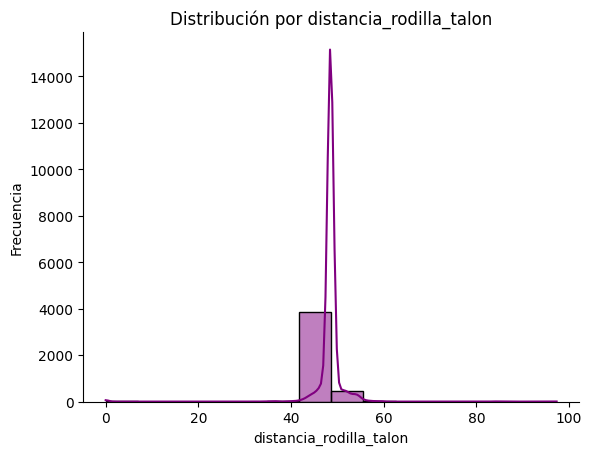

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["distancia_rodilla_talon"], kde = True , color = "purple")

plt.xlabel("distancia_rodilla_talon")
plt.ylabel("Frecuencia")
plt.title("Distribución por distancia_rodilla_talon")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# circunferencia_de_la_pantorrilla

In [75]:
df["circunferencia_de_la_pantorrilla"].unique()

array([ 33.5,  41.1,  37.8,  42. ,  41. ,  39.6,  35.5,  33. ,  36.6,
        36.3,  35.7,  32.2,  37.1,  28.5,  34.6,  38. ,  31.4,  42.7,
        94.7,  44.7,  36.4,  32.1,  40.6,  41.6,  39.8,  34.7,  42.3,
         0. ,  36.8,  47.8,  39.2,  26.1,  32.9,  31.9,  29.8,  39.3,
        32.7,  40.2,  43.2,  31.6,  31.2,  32.4,  39.1,  42.1, 102.5,
        36.5,  37.7,  40.3,  42.5,  36. ,  43.4,  36.2,  32.3,  34.9,
        31.5,  27.8,  23.4,  34.1,  33.9,  33.7,  33.3,  34.5,  31.7,
        36.7,  34.8,  42.9,  37.5,  40.1,  39.5,  44.4,  30.8,  38.1,
        37.2,  30. ,  50. ,  43.7,  38.5,  38.9,  92.7,  31. ,  35.2,
        34.3,  41.4, 102.3,  32.8,  38.7,  49.6,  37.6,  37. ,  35. ,
        32. ,  26. ,  39. ,  40.4,  46.5,  45.9,  37.3,  32.5,  35.6,
        33.2,  41.8,  38.2,  39.9,  35.1,  28.2,  39.4,  41.2,  36.1,
        44.8,  66.9,  40.5,  38.8,  45.3,  45.4,  33.1,  35.4,  45.8,
        48.8,  35.9,  30.5,  56.7,  29.1,  38.6,  34. ,  28.3,  70.2,
        43.8,  37.4,

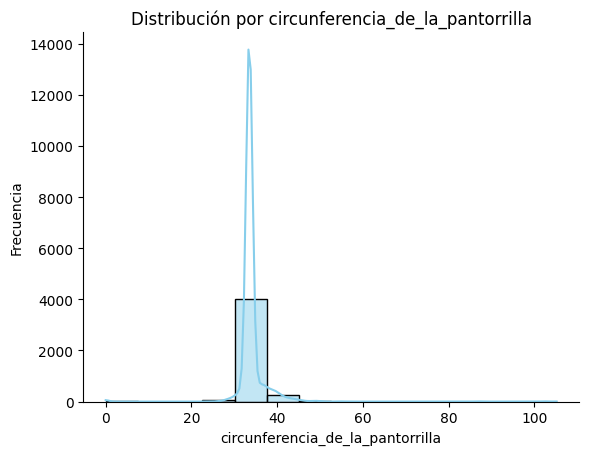

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["circunferencia_de_la_pantorrilla"], kde = True , color = "skyblue")

plt.xlabel("circunferencia_de_la_pantorrilla")
plt.ylabel("Frecuencia")
plt.title("Distribución por circunferencia_de_la_pantorrilla")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# segundamedicion_cintura

In [77]:
df["segundamedicion_cintura"].unique()

array([  0. , 113.7, 103.7, 118.9, 134.2,  92.4,  98. ,  95.1, 113.4,
       102.6,  98.7, 107. ,  89.1, 114.3,  98.6, 130.5,  94.4, 129.4,
       102.8,  79.4, 111.3, 119.1, 122.2, 120. ,  91.5, 130.8, 109.2,
       128. , 104.8, 108.2,  96.9,  92.6, 117.4, 108.8,  81.2,  82.3,
       103.9, 128.3,  87.7, 100.1,  92.8,  89.5, 126.2,  98.2, 102.5,
       107.6, 103.2,  97. , 106.2, 100.4,  93.9, 111.9,  96.4,  98.8,
       106.7,  89.7,  76.1,  89.4, 106.1,  87.9, 107.4,  88.9, 111.1,
       123.6,  90.3, 103.8,  99.4, 100.3, 108.9, 103.6, 104.6, 113.8,
       105.5, 111.5, 124. ,  99. ,  87. , 102.2,  87.2,  86.7, 107.5,
        95.7, 103. ,  77.4, 109.1,  87.5, 118.5,  93.4, 100.6,  96.2,
        77.1, 109.8, 108.5,  91.7, 117.9,  92.7,  97.3,  95. , 106.5,
       102.3,  81.5,  90. , 109.5,  79.8, 105. ,  80.4, 119.5,  89. ,
        79. ,  91. ,  88. , 105.2,  81.8,  96.8, 105.1, 107.2, 125.4,
       111.2,  93.7,  81.6,  85. ,  93.5, 112. ,  94.2,  97.5, 136.6,
       123.4, 136.5,

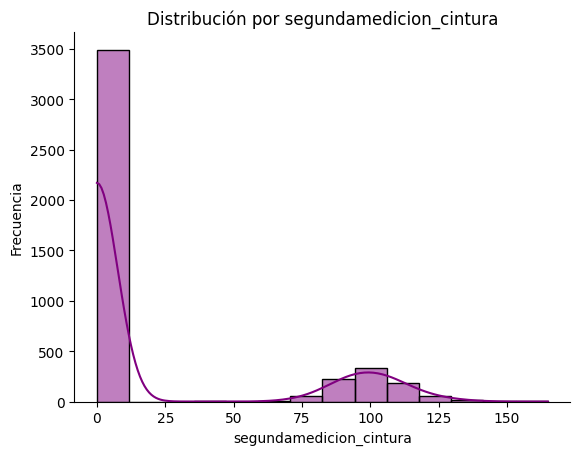

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["segundamedicion_cintura"], kde = True , color = "purple")

plt.xlabel("segundamedicion_cintura")
plt.ylabel("Frecuencia")
plt.title("Distribución por segundamedicion_cintura")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# tension_arterial

In [79]:
df["tension_arterial"].unique()

array([107, 104, 105, 117, 123, 149, 119, 113, 102, 111, 128, 110,  83,
       126, 108,  99,  90, 118, 139, 121, 140, 116, 114, 106, 115, 122,
        95, 109, 142, 138, 101, 120, 125, 130,  94, 112, 124, 191, 127,
       143, 147,  98,  93, 134, 151, 132, 153,   0, 136, 167,  97, 135,
       100,  96, 148, 131, 176, 137, 180, 129, 193, 152,  88, 198, 155,
       141, 170, 169, 144, 154, 150, 179, 145, 171, 187, 168, 156,  92,
       200, 172, 146, 159, 158,  91,  89, 173, 133, 188, 189, 186, 174,
       184,  85,  87, 103, 175,  84,  82, 166, 183, 160, 181, 157, 165,
        80, 199, 194, 164, 162, 192, 163, 161, 182, 197, 185, 178, 190,
        86,  81, 177, 196])

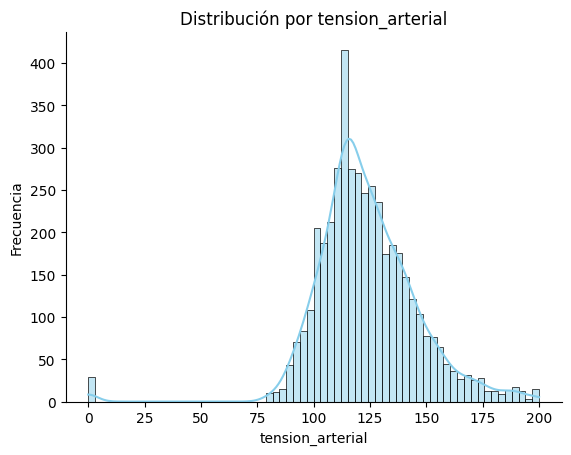

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["tension_arterial"], kde = True , color = "skyblue")

plt.xlabel("tension_arterial")
plt.ylabel("Frecuencia")
plt.title("Distribución por tension_arterial")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# sueno_horas

In [81]:
df["sueno_horas"].unique()

array([ 4,  2,  1,  5,  3, 99])

In [82]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("tension_arterial ~ C(sueno_horas)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo)
tabla_anova
#los datos son atipicos


,df,sum_sq,mean_sq,F,PR(>F)
C(sueno_horas),5.0,2.122222e+03,424.444335,0.830226,0.527946
Residual,4357.0,2.227470e+06,511.239284,NaN,NaN


In [83]:
df.drop(columns=['sueno_horas'], inplace=True)
df

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,masa_corporal,actividad_total,riesgo_hipertension,tension_arteria
0,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,107,32.889389,120,1,NaN
1,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,1.000000,240,0,NaN
2,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1.000000,480,0,NaN
3,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,0.0,117,26.265339,275,1,NaN
4,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,1.000000,255,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2,62,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.25,160.5,51.1,34.5,77.8,125,1.000000,280,0,NaN
4359,1,39,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,130,19.193721,780,0,NaN
4360,2,69,15.9,11,2.9,1.9,21,44.0,74,0.34,...,71.20,148.6,47.2,38.0,0.0,147,1.000000,300,0,NaN
4361,1,67,17.6,14,5.5,4.0,44,96.0,171,0.80,...,68.20,167.7,51.5,36.5,96.4,108,1.000000,240,0,NaN


# masa_corporal

In [84]:
df["masa_corporal"].unique()

array([32.889389  ,  1.        , 26.26533915, ..., 13.42047496,
       19.19372067, 25.60077723])

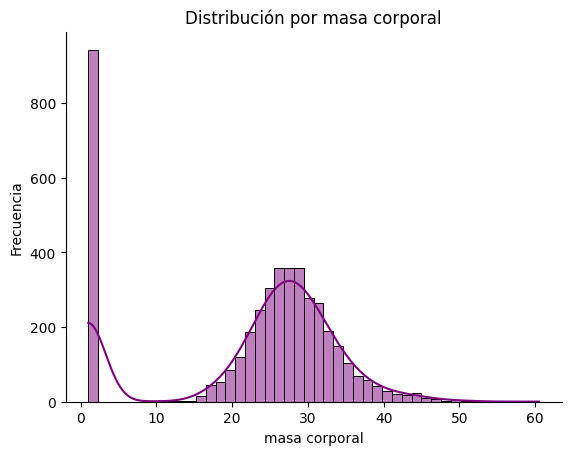

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["masa_corporal"], kde = True , color = "purple")

plt.xlabel("masa corporal")
plt.ylabel("Frecuencia")
plt.title("Distribución por masa corporal")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# actividad_total

In [86]:
df["actividad_total"].unique()

array([  120,   240,   480,   275,   255,   775,   300,   600,   740,
         150,   960,   260,   290,   105,    70,   470,   770,   210,
         390,   380,   660,   920,   195,   500,   780,   565,   570,
         270,   420,   460,   410,   930,   310,   720,   215,   435,
         315,   630,   361,   795,   595,   750,   862,   700,   675,
         360,  1260,  1200,   540,  1320,   440,   640,   250,   330,
         910,   450,   680,  1080,   375,   205,   490,   840,   320,
         280,   220,  1028,    40,   405,   345,   615,   610,   230,
          75,   140,   180,   128,   160,    60,  1170,   810,   880,
        1020,    80,   543,   782,   870,   975,   374,   800,   190,
         555,   510,   170,   865,  1050,   271,   200,    30,   900,
         495,   735,   605,   690,   110,   520,   445,   225,   560,
         340,   370,   745,   130,   620,   625,   430,   670,  1021,
          90,   860,   456,    92,   135,   125,    35,   970,   411,
          10,   400,

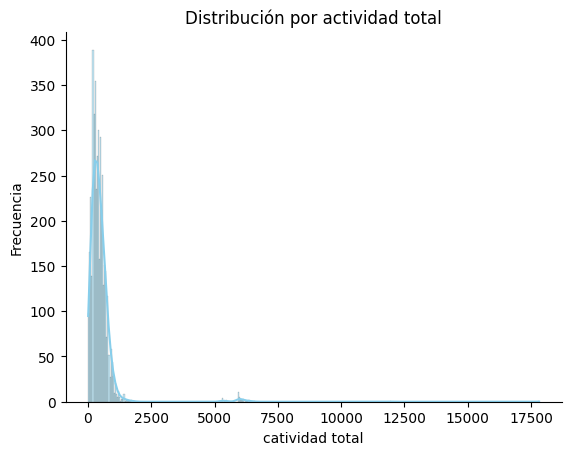

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["actividad_total"], kde = True , color = "skyblue")

plt.xlabel("catividad total")
plt.ylabel("Frecuencia")
plt.title("Distribución por actividad total")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# riesgo_hipertension

In [88]:
df["riesgo_hipertension"].unique()

array([1, 0])

In [89]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("tension_arterial ~ C(riesgo_hipertension)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo)
tabla_anova

#Los valores son atipicos

,df,sum_sq,mean_sq,F,PR(>F)
C(riesgo_hipertension),1.0,6.726145e+03,6726.145380,13.195903,0.000284
Residual,4361.0,2.222866e+06,509.714661,NaN,NaN


In [90]:
df.drop(columns=['riesgo_hipertension'], inplace=True)
df

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,medida_cintura,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,masa_corporal,actividad_total,tension_arteria
0,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,0.0,64.70,154.0,48.5,33.5,0.0,107,32.889389,120,NaN
1,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,0.0,96.75,152.2,44.5,41.1,113.7,104,1.000000,240,NaN
2,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,0.0,68.70,144.8,42.3,37.8,103.7,105,1.000000,480,NaN
3,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,98.5,64.70,154.0,48.5,33.5,0.0,117,26.265339,275,NaN
4,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,0.0,97.15,161.3,49.6,42.0,118.9,123,1.000000,255,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2,62,14.2,22,4.8,4.0,34,86.0,139,0.58,...,0.0,64.25,160.5,51.1,34.5,77.8,125,1.000000,280,NaN
4359,1,39,14.2,22,4.8,4.0,34,86.0,139,0.58,...,80.0,64.70,154.0,48.5,33.5,0.0,130,19.193721,780,NaN
4360,2,69,15.9,11,2.9,1.9,21,44.0,74,0.34,...,0.0,71.20,148.6,47.2,38.0,0.0,147,1.000000,300,NaN
4361,1,67,17.6,14,5.5,4.0,44,96.0,171,0.80,...,0.0,68.20,167.7,51.5,36.5,96.4,108,1.000000,240,NaN


# Mapa de Calor

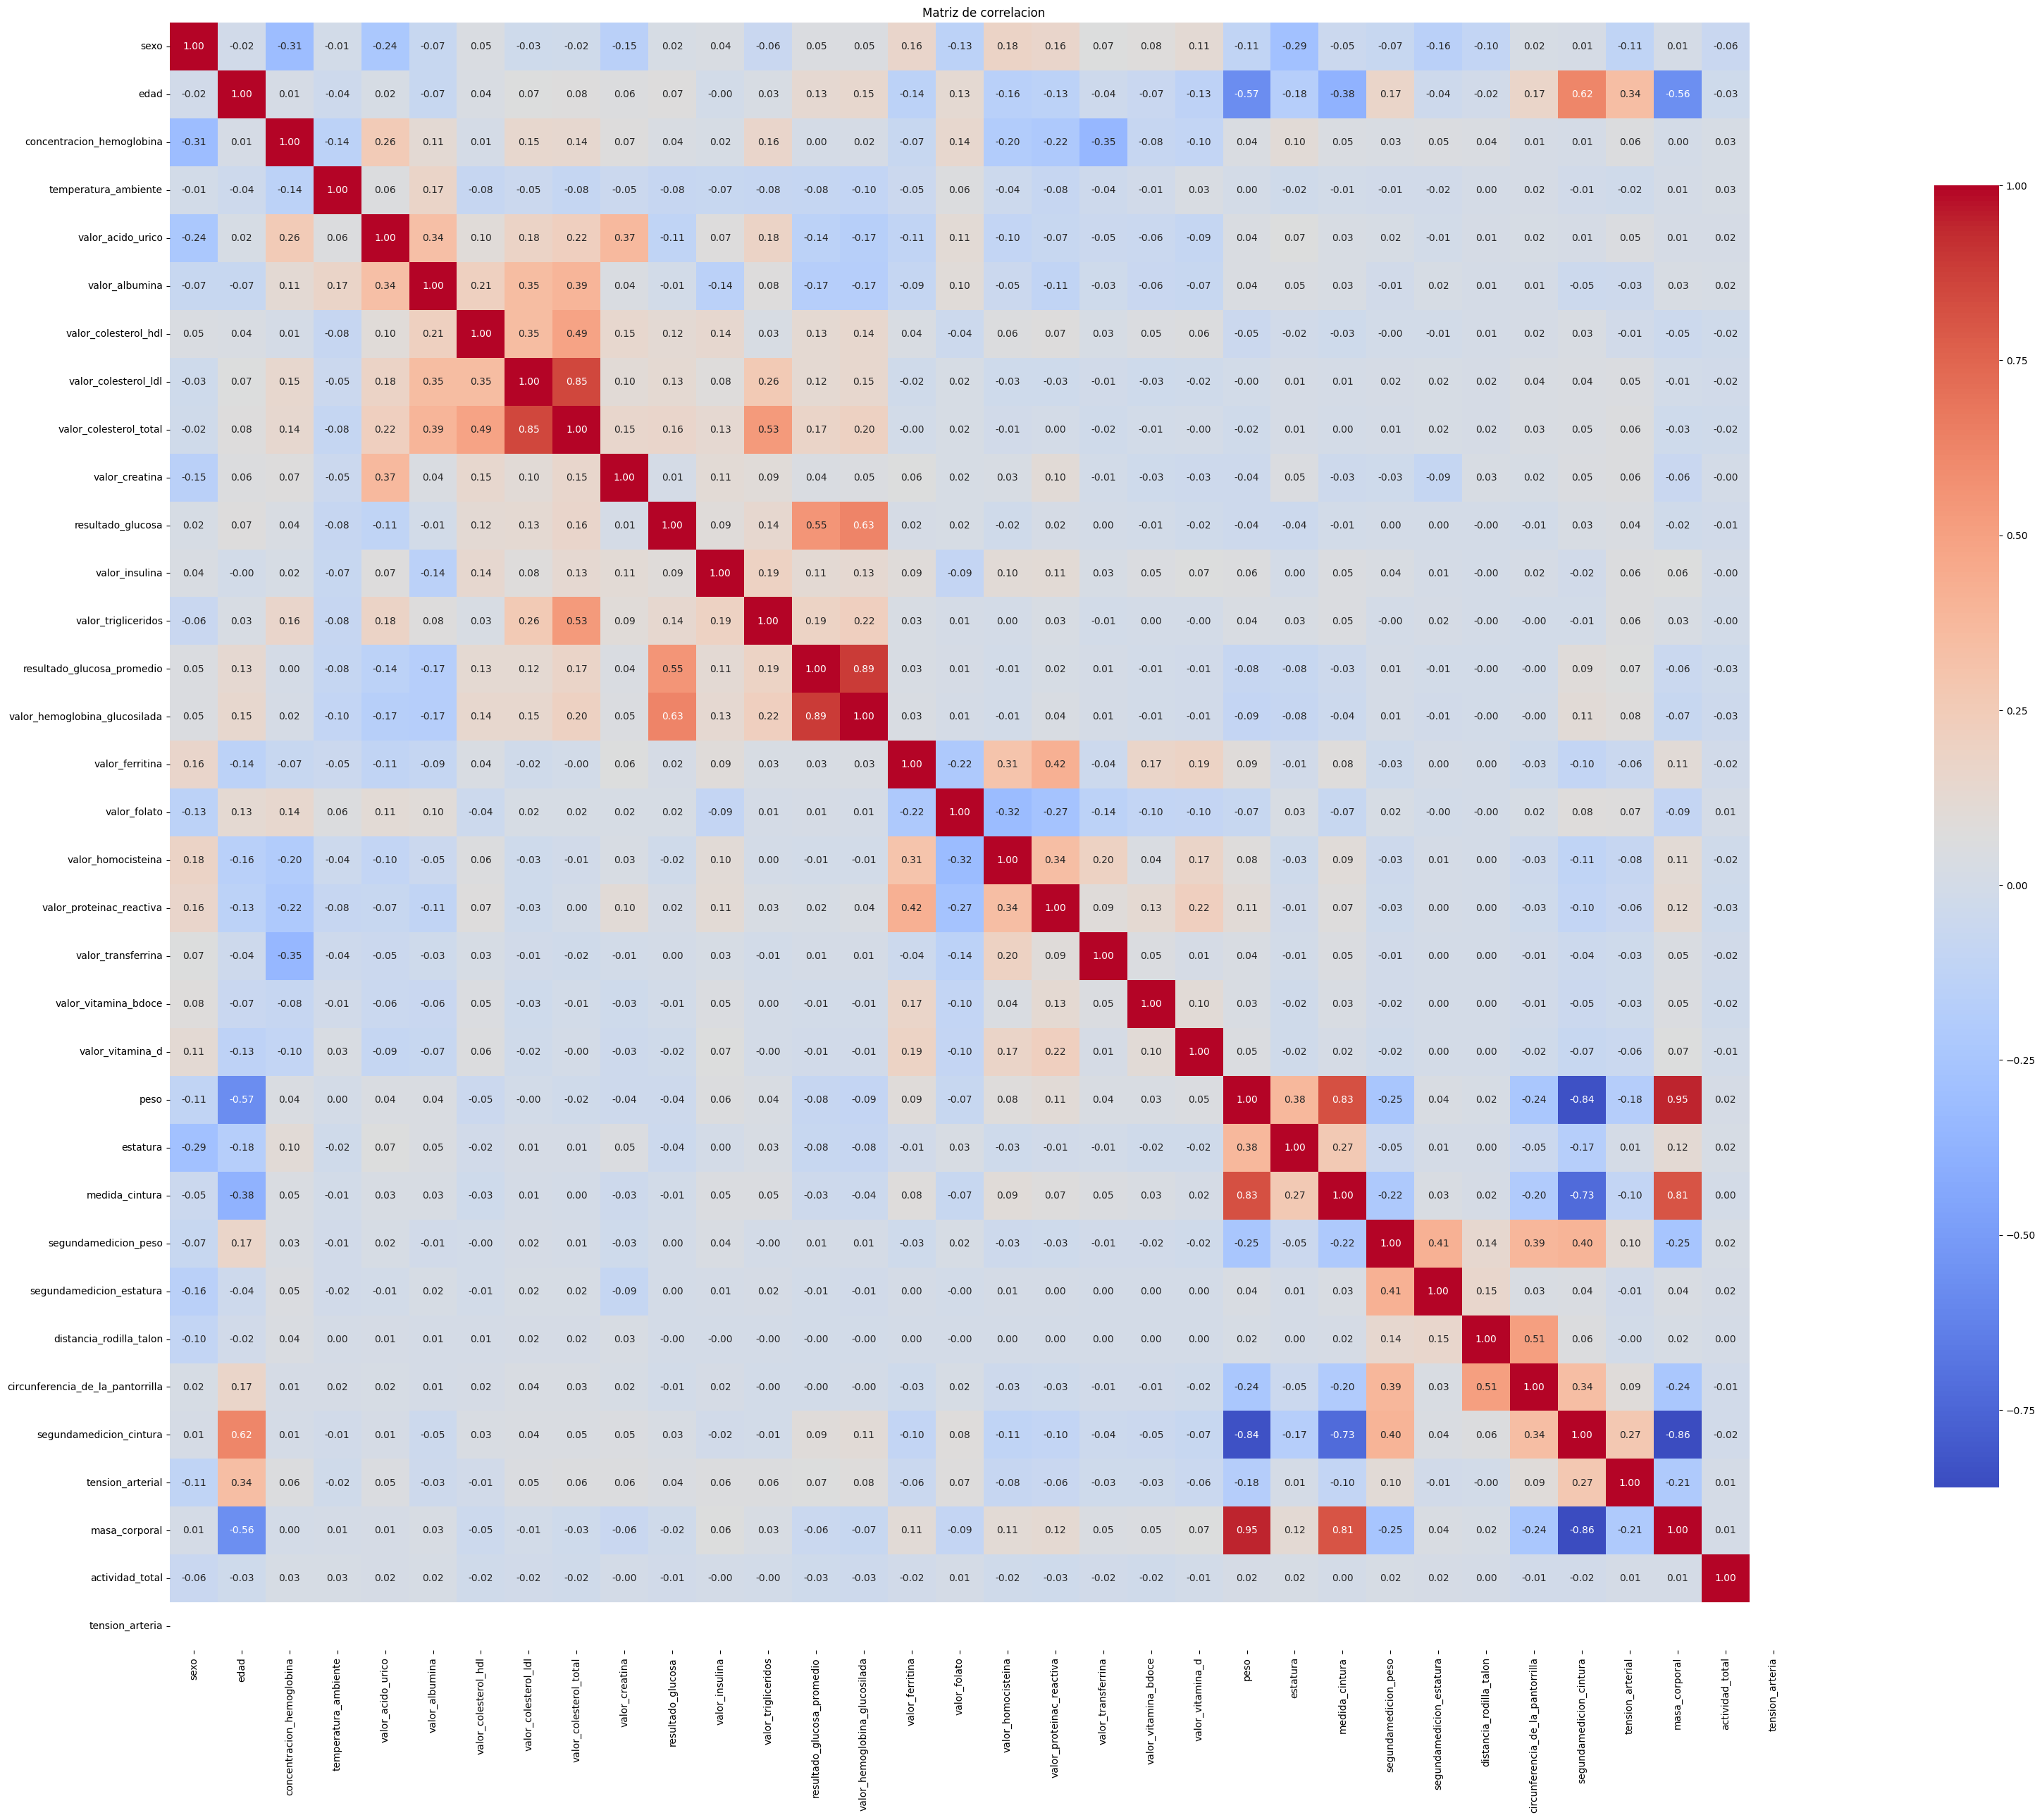

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize =(50, 30))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = ".2f", square = True, cbar_kws = {"shrink": 0.8})
plt.title('Matriz de correlacion')
plt.show()

Coeficiente de correlacion:  0.1072



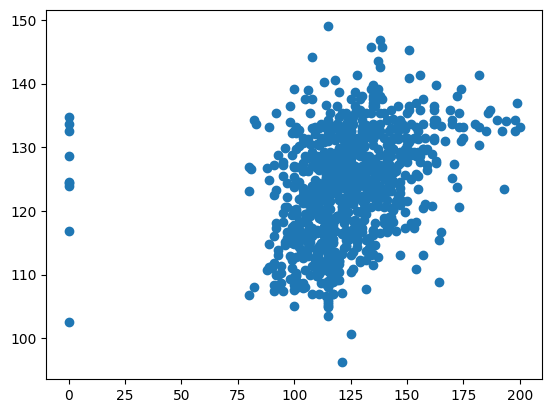

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


X = df[['edad',	'sexo',	'peso',	'estatura']]
Y = df["tension_arterial"]

# Datos de entrenamiento y datos de prueba

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de correlacion: {r2: 0.4f}\n')

# Hipotesis

La combinación de una mayor frecuencia de consumo de bebidas azucaradas, un menor nivel de actividad física y una predisposición genética a la obesidad (inferida por la presencia de antecedentes familiares de obesidad) se asocia positivamente con un mayor índice de masa corporal (IMC).


---



# Regresión Ajustada

In [93]:
import pandas as pd
import statsmodels.api as sm

variable_dependiente = df['tension_arterial']
variables_independientes = df[['edad',	'sexo',	'peso',	'estatura']]

variables_independientes = sm.add_constant(variables_independientes)

modelo = sm.OLS(variable_dependiente, variables_independientes)
resultados = modelo.fit()

print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:       tension_arterial   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          2.15e-132
Time:                        05:58:48   Log-Likelihood:                -19486.
No. Observations:                4363   AIC:                         3.898e+04
Df Residuals:                    4358   BIC:                         3.901e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.3477      4.408     21.629      0.0

# Coeficiente de Determinación

In [94]:
import pandas as pd
import statsmodels.api as sm


variable_dependiente = df['tension_arterial']
variables_independientes = df[['edad',	'sexo',	'peso',	'estatura']]


variables_independientes = sm.add_constant(variables_independientes)

modelo = sm.OLS(variable_dependiente, variables_independientes)
resultados = modelo.fit()

r_cuadrado = resultados.rsquared

print(f"El coeficiente de determinación (R-cuadrado) es: {r_cuadrado}")

print(resultados.summary())

El coeficiente de determinación (R-cuadrado) es: 0.13214862228394375
                            OLS Regression Results                            
Dep. Variable:       tension_arterial   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          2.15e-132
Time:                        05:58:48   Log-Likelihood:                -19486.
No. Observations:                4363   AIC:                         3.898e+04
Df Residuals:                    4358   BIC:                         3.901e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

El modelo de regresión lineal explica aproximadamente el 13.2% de la variabilidad en la tensión arterial (R-cuadrado = 0.132). El modelo en general es estadísticamente significativo (Prob(F-statistic) < 0.001).
La edad, el sexo y la estatura son predictores significativos, pero el peso no lo es en este modelo. Además, se identificaron problemas con la distribución de los residuos y posible multicolinealidad, lo que sugiere que se deben tener precaución con las interpretaciones y considerar análisis o modelos adicionales.


---



# Linealidad, Normalidad y Homoscedasticidad

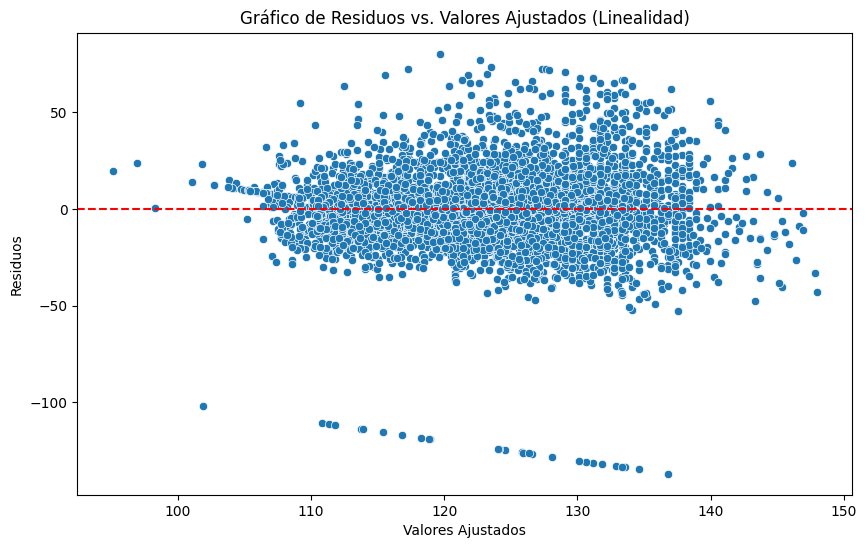

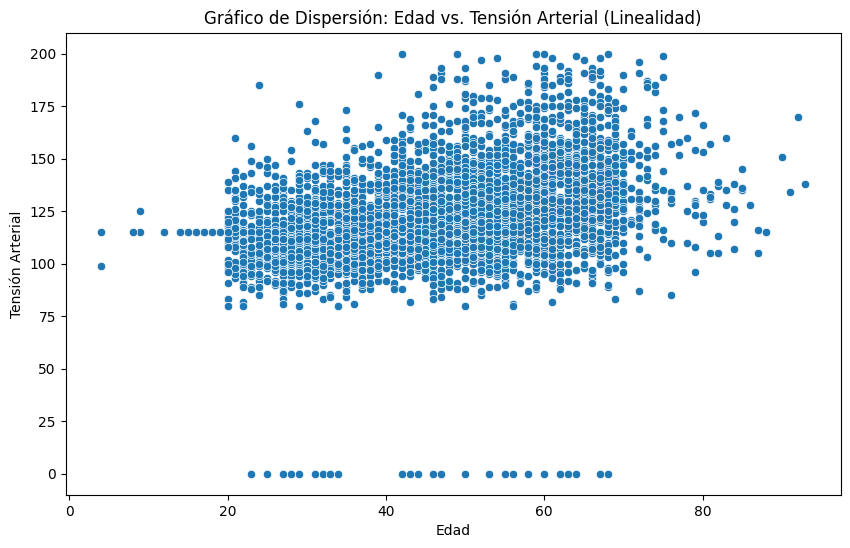

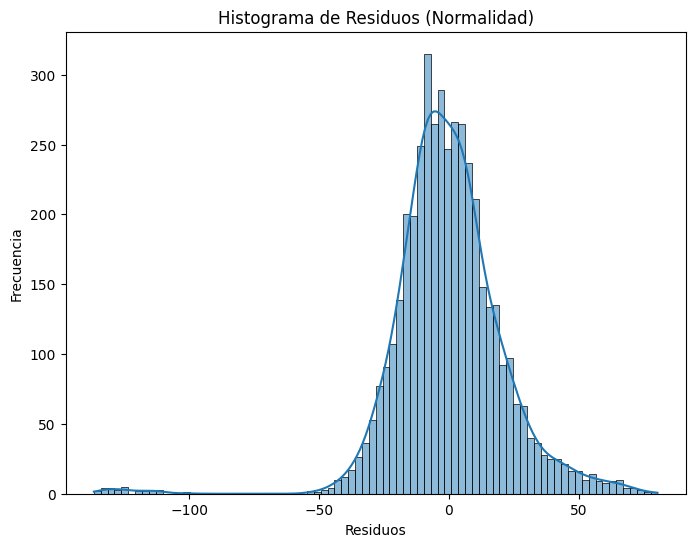

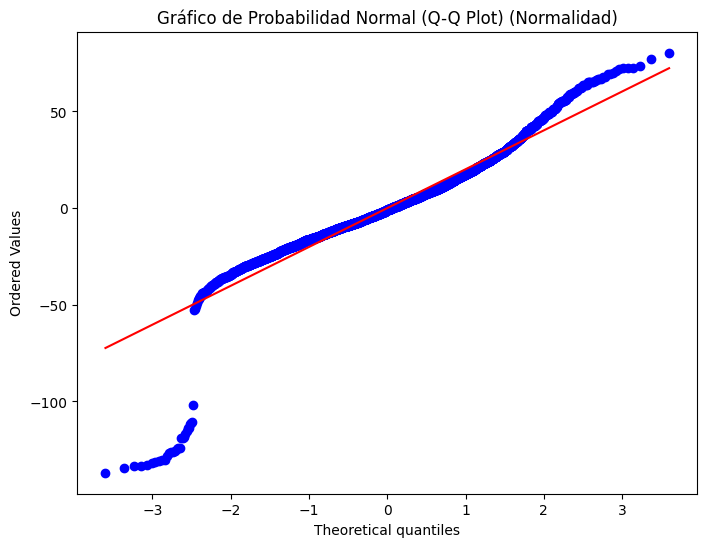


Prueba de Shapiro-Wilk: Estadístico = 0.909, p-valor = 0.000


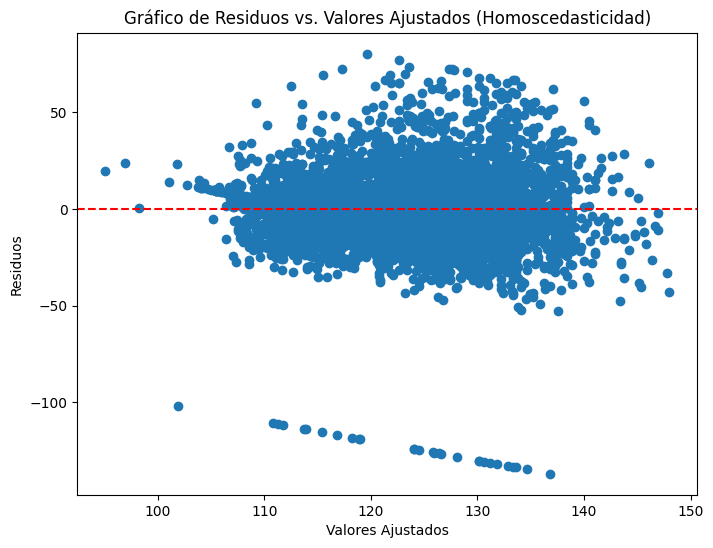

In [95]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

variable_dependiente = df['tension_arterial']
variables_independientes = df[['edad',	'sexo',	'peso',	'estatura']]

# --- 1. Linealidad ---

plt.figure(figsize=(10, 6))
sns.scatterplot(x=resultados.fittedvalues, y=resultados.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Ajustados (Linealidad)")
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['edad'], y=df['tension_arterial'])
plt.xlabel("Edad")
plt.ylabel("Tensión Arterial")
plt.title("Gráfico de Dispersión: Edad vs. Tensión Arterial (Linealidad)")
plt.show()



# --- 2. Normalidad de los Residuos ---


plt.figure(figsize=(8, 6))
sns.histplot(resultados.resid, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos (Normalidad)")
plt.show()


plt.figure(figsize=(8, 6))
stats.probplot(resultados.resid, dist="norm", plot=plt)
plt.title("Gráfico de Probabilidad Normal (Q-Q Plot) (Normalidad)")
plt.show()

shapiro_test = stats.shapiro(resultados.resid)
print(f"\nPrueba de Shapiro-Wilk: Estadístico = {shapiro_test.statistic:.3f}, p-valor = {shapiro_test.pvalue:.3f}")

# --- 3. Homoscedasticidad (Varianza Constante de los Residuos) ---

plt.figure(figsize=(8, 6))
plt.scatter(resultados.fittedvalues, resultados.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt
plt.title("Gráfico de Residuos vs. Valores Ajustados (Homoscedasticidad)")
plt.show()



# Conclusión

El análisis de los residuos sugiere que el modelo presenta varios problemas con el cumplimiento de las suposiciones clave de los modelos de regresión lineal. Específicamente:

Linealidad: Aunque el primer gráfico de residuos vs. valores ajustados no mostraba una violación severa de la linealidad, el gráfico de dispersión inicial entre las variables (Edad vs. Tensión Arterial) insinuaba una relación posiblemente no lineal. Esto podría estar contribuyendo a los problemas observados en los residuos.
Homocedasticidad: El segundo gráfico de residuos vs. valores ajustados (etiquetado para homocedasticidad) muestra una dispersión de los residuos que parece relativamente constante, lo que sugiere que la suposición de homocedasticidad podría cumplirse de manera razonable.
Normalidad: Tanto el histograma de residuos como el gráfico de probabilidad normal (Q-Q plot) indican una desviación significativa de la normalidad en la distribución de los residuos. Se observa asimetría positiva, colas pesadas y la posible presencia de valores atípicos, especialmente en la cola inferior.



si bien la homocedasticidad podría no ser un problema grave, la posible no linealidad en la relación entre las variables y, de manera más clara, la falta de normalidad en la distribución de los residuos son preocupaciones importantes. Estas violaciones de las suposiciones pueden afectar la fiabilidad de las pruebas de hipótesis, los intervalos de confianza y las predicciones realizadas por el modelo.

---

